## --->`import libraries`

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler , LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn_features.transformers import DataFrameSelector

from sklearn.metrics import r2_score , f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib

## ---->`import dataset`

In [5]:
df = pd.read_csv(r'D:\Epsilon.DS\Final_Project\Final_Project hotel reservation data\Hotel Reservations.csv',sep = ',')

df.shape

(36275, 19)

In [6]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## ---->`explore data`

In [7]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [9]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [11]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [12]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [13]:
df['required_car_parking_space'].unique()

array([0, 1], dtype=int64)

In [14]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [15]:
df['repeated_guest'].unique()

array([0, 1], dtype=int64)

In [16]:
df['no_of_previous_cancellations'].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6], dtype=int64)

In [17]:
df['no_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [18]:
 df['no_of_previous_bookings_not_canceled'].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36], dtype=int64)

In [19]:
df['lead_time'].unique()

array([224,   5,   1, 211,  48, 346,  34,  83, 121,  44,   0,  35,  30,
        95,  47, 256,  99,  12, 122,   2,  37, 130,  60,  56,   3, 107,
        72,  23, 289, 247, 186,  64,  96,  41,  55, 146,  32,  57,   7,
       124, 169,   6,  51,  13, 100, 139, 117,  39,  86,  19, 192, 179,
        26,  74, 143, 177,  18, 267, 155,  46, 128,  20,  40, 196, 188,
        17, 110,  68,  73,  92, 171, 134, 320, 118, 189,  16,  24,   8,
        10, 182, 116, 123, 105, 443, 317, 286, 148,  14,  85,  25,  28,
        80,  11, 162,  82,  27, 245, 266, 112,  88,  69, 273,   4,  97,
        31,  62, 197, 280, 185, 160, 104,  22, 292, 109, 126, 303,  81,
        54,  15, 161, 147,  87, 127, 418, 156,  58, 433, 111, 195, 119,
        59,  78, 335, 103,  70,  76, 144,  49,  77,  36,  79,  21,  33,
       164, 152,  43, 102,  71, 209,  93,  53, 302, 239,  45, 167, 113,
        84,   9, 166, 174,  61, 151,  52,  67, 282,  38, 175,  89, 133,
        65,  66,  50, 159, 386, 115, 237, 125,  91,  29, 221, 21

In [20]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [21]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [22]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [23]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## ---->`EDA`

In [24]:
df['arrival_date'].max()

31

In [25]:
df['arrival_date'].unique()

array([ 2,  6, 28, 20, 11, 13, 15, 26, 18, 30,  5, 10,  4, 25, 22, 21, 19,
       17,  7,  9, 27,  1, 29, 16,  3, 24, 14, 31, 23,  8, 12],
      dtype=int64)

In [26]:
date = pd.concat([df['arrival_year'], df['arrival_month'], df['arrival_date']], axis=1)
date

,arrival_year,arrival_month,arrival_date
0,2017,10,2
1,2018,11,6
2,2018,2,28
3,2018,5,20
4,2018,4,11
...,...,...,...
36270,2018,8,3
36271,2018,10,17
36272,2018,7,1
36273,2018,4,21


### -->`Number of visitors`

In [27]:
num_adult = df.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
num_adult

,count
no_of_adults,
2,26108
1,7695
3,2317
0,139
4,16


array([<AxesSubplot:ylabel='count'>], dtype=object)

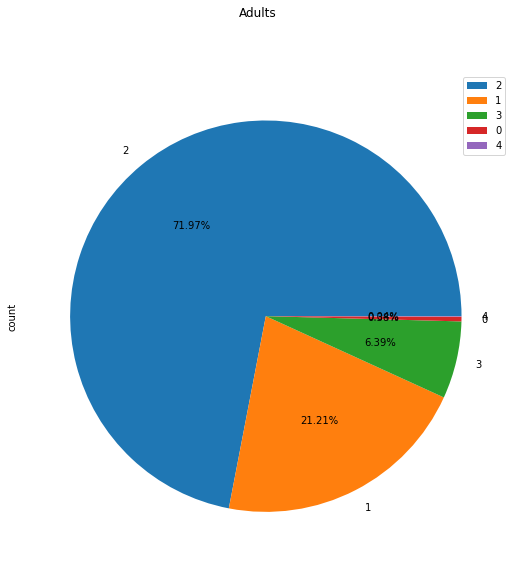

In [28]:
num_adult.plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Adults',figsize=(9,9))

In [29]:
num_child = df.groupby('no_of_children')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
num_child

,count
no_of_children,
0,33577
1,1618
2,1058
3,19
9,2
10,1


array([<AxesSubplot:ylabel='count'>], dtype=object)

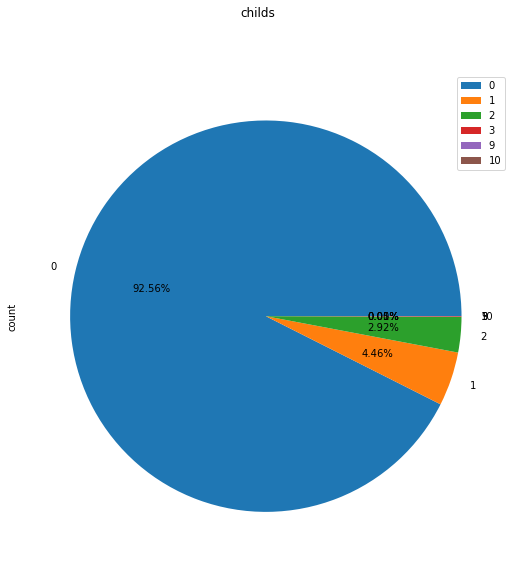

In [30]:
num_child.plot(kind='pie',autopct='%1.2f%%',subplots=True,title='childs',figsize=(9,9))

### -->`Nights`

In [31]:
weekend_nights = df.groupby('no_of_weekend_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
weekend_nights

,count
no_of_weekend_nights,
0,16872
1,9995
2,9071
3,153
4,129
5,34
6,20
7,1


<AxesSubplot:xlabel='no_of_weekend_nights'>

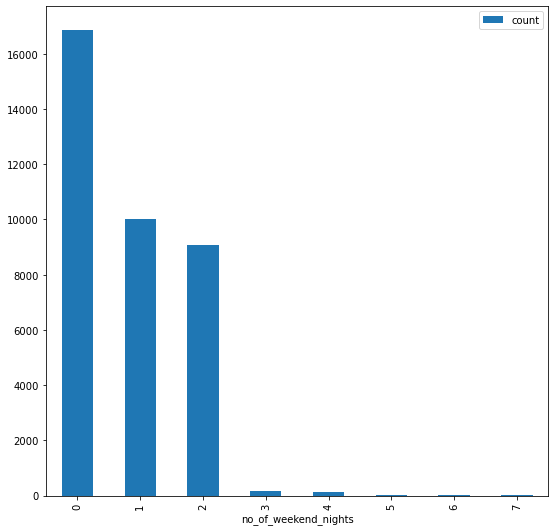

In [32]:
weekend_nights.plot(kind='bar',figsize=(9,9))

In [33]:
week_nights = df.groupby('no_of_week_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
week_nights

,count
no_of_week_nights,
2,11444
1,9488
3,7839
4,2990
0,2387
5,1614
6,189
7,113
10,62


<AxesSubplot:xlabel='no_of_week_nights'>

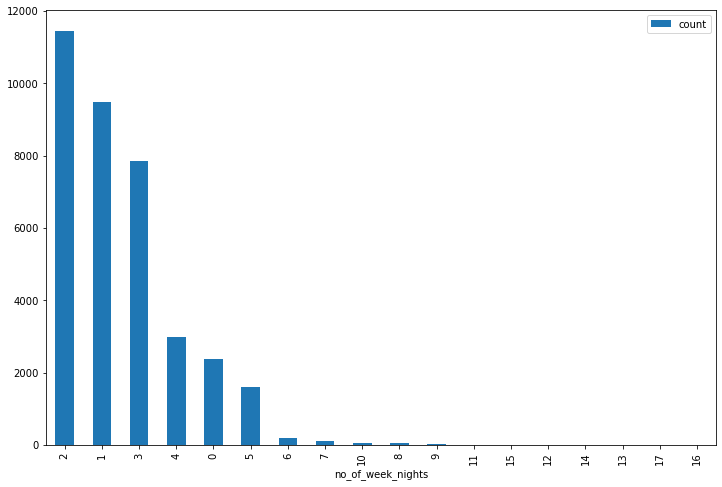

In [34]:
week_nights.plot(kind='bar',figsize=(12,8))

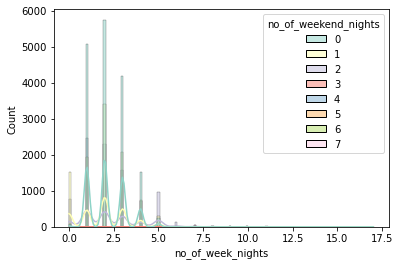

In [35]:
sns.histplot(x='no_of_week_nights',data=df,hue='no_of_weekend_nights',kde=True,palette='Set3')
plt.show()

### -->`Meal plans`

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305
Meal Plan 3,5


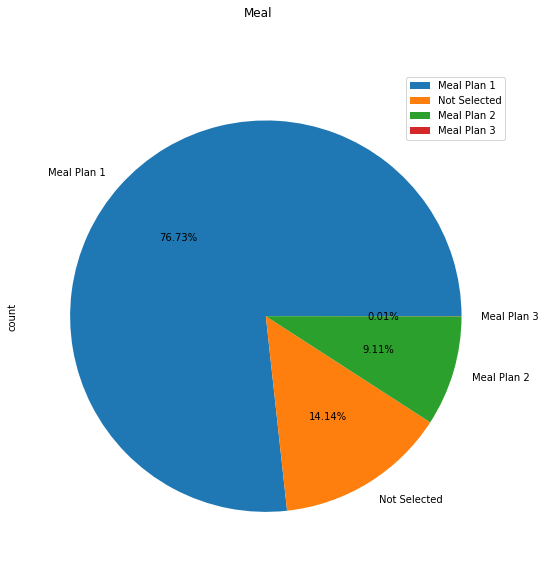

In [36]:
meal_type = df.groupby('type_of_meal_plan')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

meal_type.plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Meal',figsize=(9,9))

meal_type

### -->`Parking spaces`

In [37]:
parking_space = df.groupby('required_car_parking_space')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
parking_space

,count
required_car_parking_space,
0,35151
1,1124


<AxesSubplot:title={'center':'parking_space'}, xlabel='required_car_parking_space', ylabel='count'>

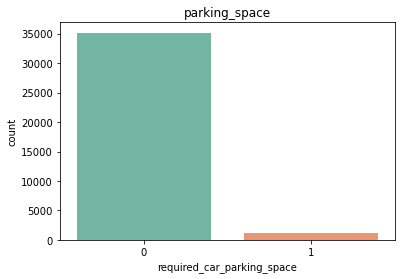

In [38]:
# parking_space{0 = 'No', 1 = 'yes'}
plt.plot(5,1,5)
plt.gca().set_title('parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

### -->`Room type`

In [39]:
room_type = df.groupby('room_type_reserved')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
room_type

,count
room_type_reserved,
Room_Type 1,28130
Room_Type 4,6057
Room_Type 6,966
Room_Type 2,692
Room_Type 5,265
Room_Type 7,158
Room_Type 3,7


<AxesSubplot:title={'center':'room_type'}, ylabel='room_type_reserved'>

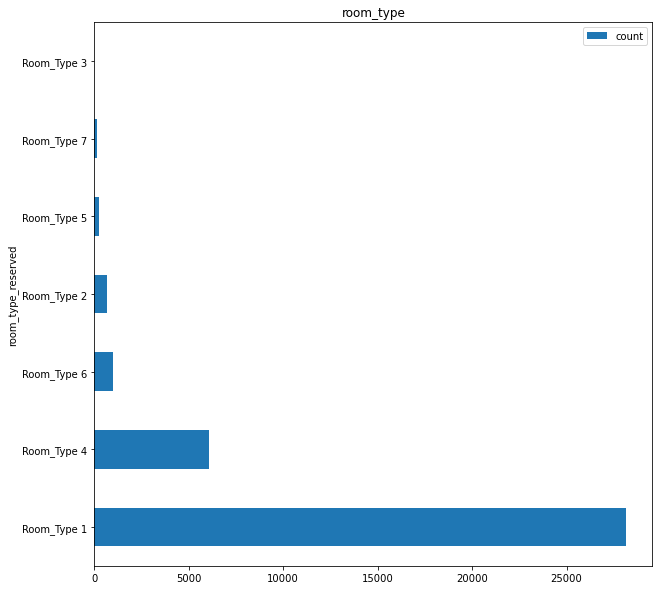

In [40]:
room_type.plot(kind='barh',title='room_type',figsize=(10,10))

In [41]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### -->`Segments`

In [42]:
segment_type = df.groupby('market_segment_type')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
segment_type

,count
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


<AxesSubplot:title={'center':'segment_type'}, xlabel='market_segment_type', ylabel='count'>

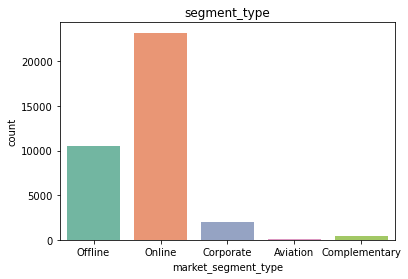

In [43]:
plt.plot(5,1,5)
plt.gca().set_title('segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

### -->`Repeated guest`

In [44]:
repaeted_guest = df.groupby('repeated_guest')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
repaeted_guest

,count
repeated_guest,
0,35345
1,930


### -->`Cancellations before`

In [45]:
num_cancellation = df.groupby('no_of_previous_cancellations')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
num_cancellation

,count
no_of_previous_cancellations,
0,35937
1,198
2,46
3,43
11,25
5,11
4,10
13,4
6,1


In [46]:
num_not_cancellation = df.groupby('no_of_previous_bookings_not_canceled')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
num_not_cancellation

,count
no_of_previous_bookings_not_canceled,
0,35463
1,228
2,112
3,80
4,65
5,60
6,36
7,24
8,23


In [47]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### -->Avg price

In [48]:
def avg_price_per_room(x):
    if x <= 50 :
        x = 'price less than 50'
    elif x > 50 and x < 100 :
        x = 'price from 50 to 100'
    elif x > 100 and x < 300 :
        x = 'price from 100 to 300'
    elif x > 300 and x < 450 :
        x = 'price from 300 to 450'
    else:
        x =  'price +450'

    return x


In [49]:
df['price_per_room'] = df['avg_price_per_room'].apply(avg_price_per_room)

In [50]:
df['price_per_room'].unique()

array(['price from 50 to 100', 'price from 100 to 300', 'price +450',
       'price less than 50', 'price from 300 to 450'], dtype=object)

<AxesSubplot:ylabel='price_per_room'>

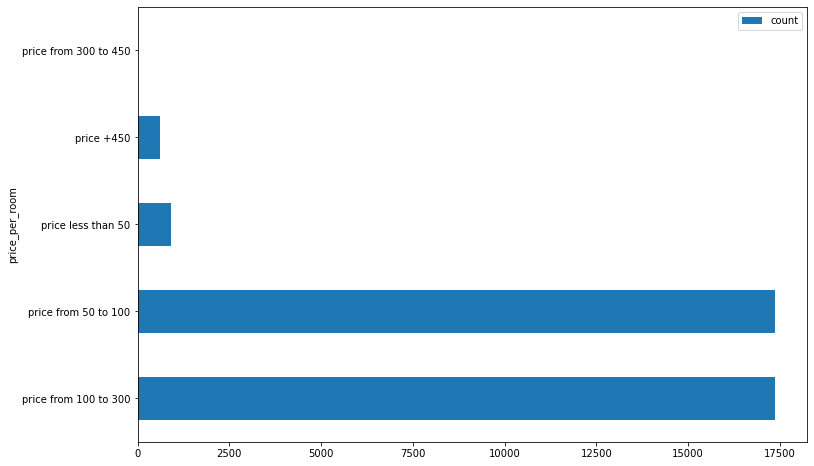

In [51]:
df.groupby('price_per_room')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh',figsize=(12,8))

### -->Special requests

In [52]:
num_special = df.groupby('no_of_special_requests')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
num_special

,count
no_of_special_requests,
0,19777
1,11373
2,4364
3,675
4,78
5,8


<AxesSubplot:xlabel='no_of_special_requests'>

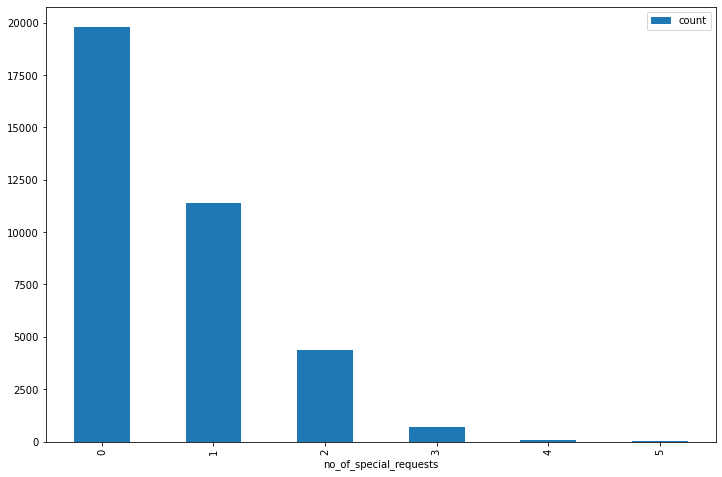

In [53]:
num_special.plot(kind='bar',figsize=(12,8))

### -->Special requests

In [54]:
cancel_booking = df.groupby('booking_status')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)
cancel_booking

,count
booking_status,
Not_Canceled,24390
Canceled,11885


array([<AxesSubplot:ylabel='count'>], dtype=object)

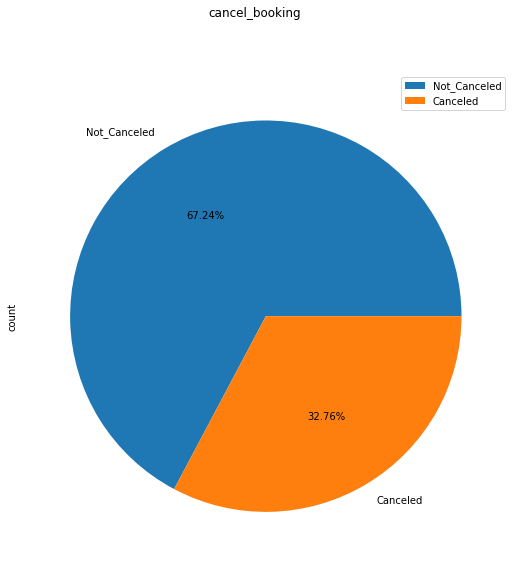

In [55]:
cancel_booking.plot(kind='pie',autopct='%1.2f%%',subplots=True,title='cancel_booking',figsize=(12,9))

### --->Date(year,month,day)

In [56]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_per_room
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,price from 50 to 100
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,price from 100 to 300
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,price from 50 to 100
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,price +450
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,price from 50 to 100


In [57]:
df.groupby('arrival_year')[['arrival_month','arrival_date']].mean().sort_values(by='arrival_year',ascending=False)

,arrival_month,arrival_date
arrival_year,,
2018,6.935788,15.674070
2017,9.652594,15.244857


In [58]:
# max year
df.groupby('arrival_year').max().sort_values(by='arrival_year',ascending=True)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_per_room
arrival_year,,,,,,,,,,,,,,,,,,,
2017,INN36260,3,9,6,15,Not Selected,1,Room_Type 7,327,12,31,Online,1,2,14,250.0,5,Not_Canceled,price less than 50
2018,INN36275,4,10,7,17,Not Selected,1,Room_Type 7,443,12,31,Online,1,13,58,540.0,5,Not_Canceled,price less than 50


In [59]:
# max month
df.groupby('arrival_month').max().sort_values(by='arrival_month',ascending=True).head(1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_per_room
arrival_month,,,,,,,,,,,,,,,,,,,
1,INN36252,3,10,6,17,Not Selected,1,Room_Type 7,173,2018,31,Online,1,11,20,194.67,3,Not_Canceled,price less than 50


In [60]:
# max day
df.groupby('arrival_date').max().sort_values(by='arrival_date',ascending=True).head(1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_per_room
arrival_date,,,,,,,,,,,,,,,,,,,
1,INN36273,3,3,5,15,Not Selected,1,Room_Type 7,322,2018,12,Online,1,3,23,294.0,4,Not_Canceled,price less than 50


array([<AxesSubplot:title={'center':'count'}, xlabel='arrival_month'>],
      dtype=object)

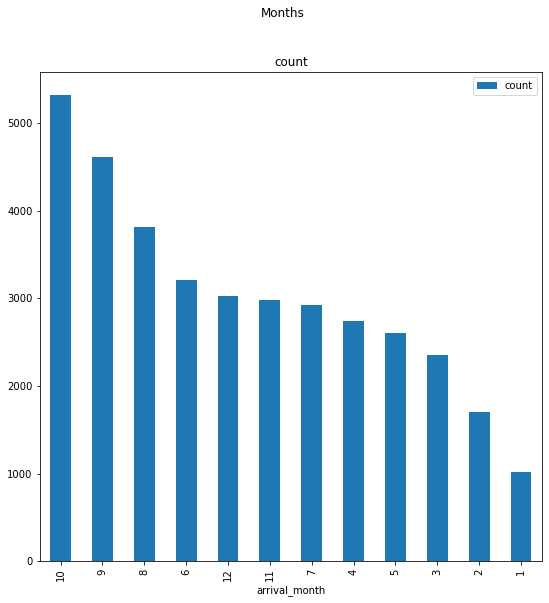

In [61]:
df.groupby('arrival_month')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',subplots=True,title='Months',figsize=(9,9))

In [62]:
# season of booking
def season(x):
    if x in [9,10,11]:
        return 'autumn'
    elif x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'

    return x

In [63]:
df['season_booking'] = df['arrival_month'].apply(season)

In [64]:
df['season_booking'].unique()

array(['autumn', 'winter', 'spring', 'summer'], dtype=object)

In [65]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_per_room,season_booking
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,price from 50 to 100,autumn
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,price from 100 to 300,autumn
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,price from 50 to 100,winter
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,price +450,spring
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,price from 50 to 100,spring


### -->`Bivariate Analysis`

<AxesSubplot:xlabel='booking_status', ylabel='count'>

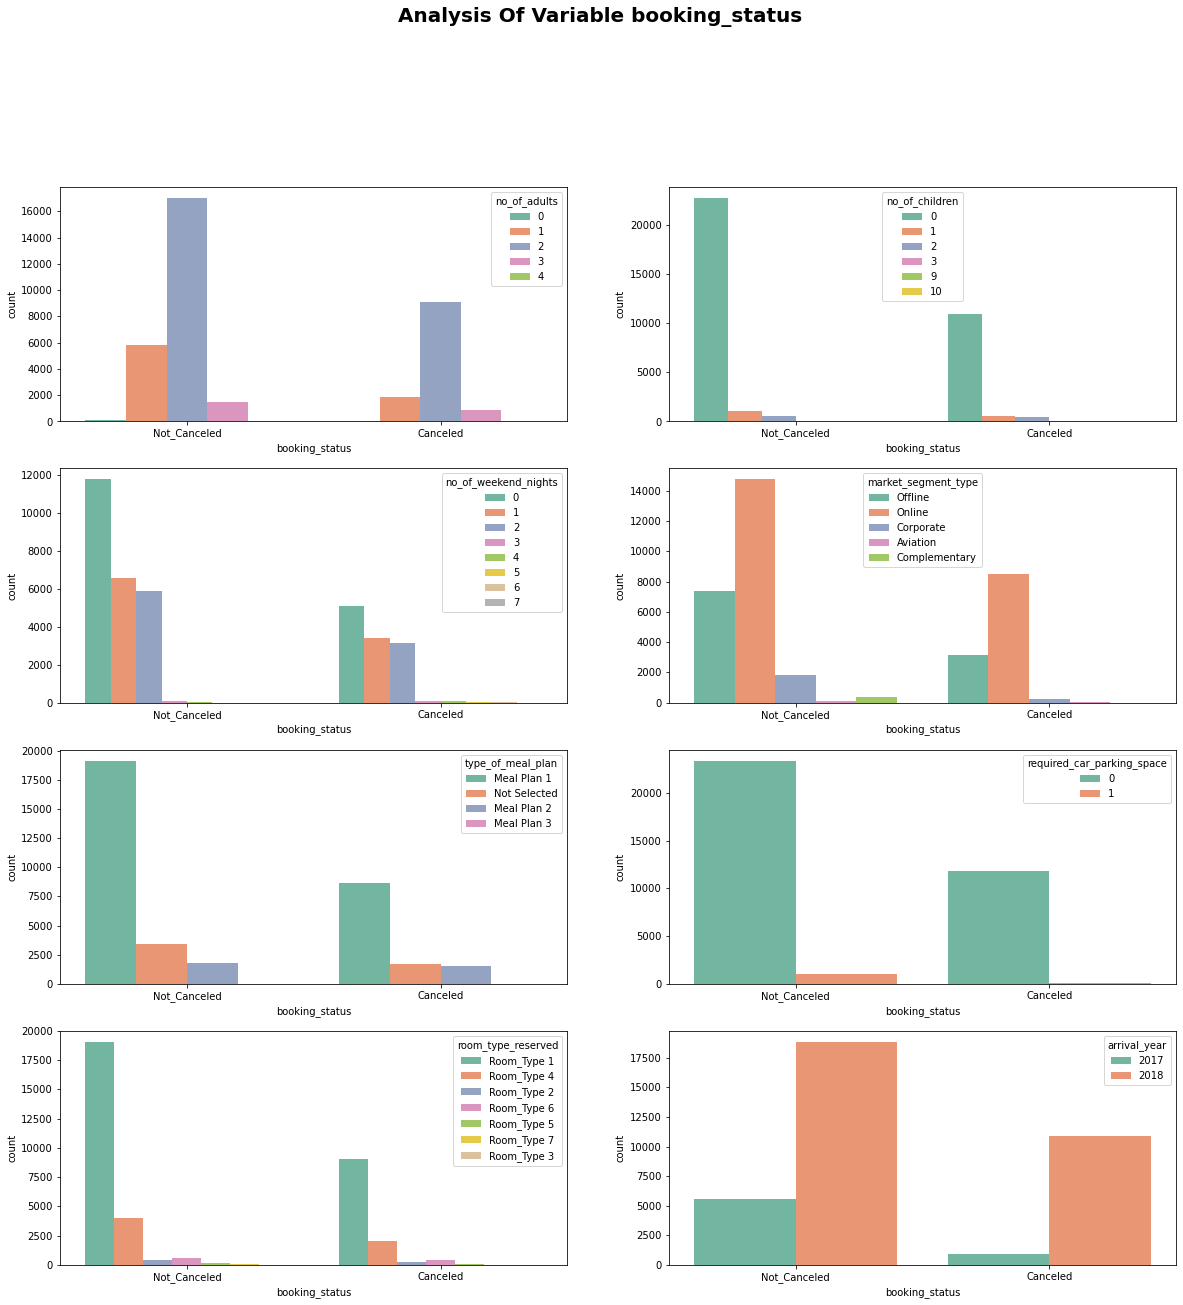

In [66]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

<AxesSubplot:xlabel='no_of_special_requests', ylabel='lead_time'>

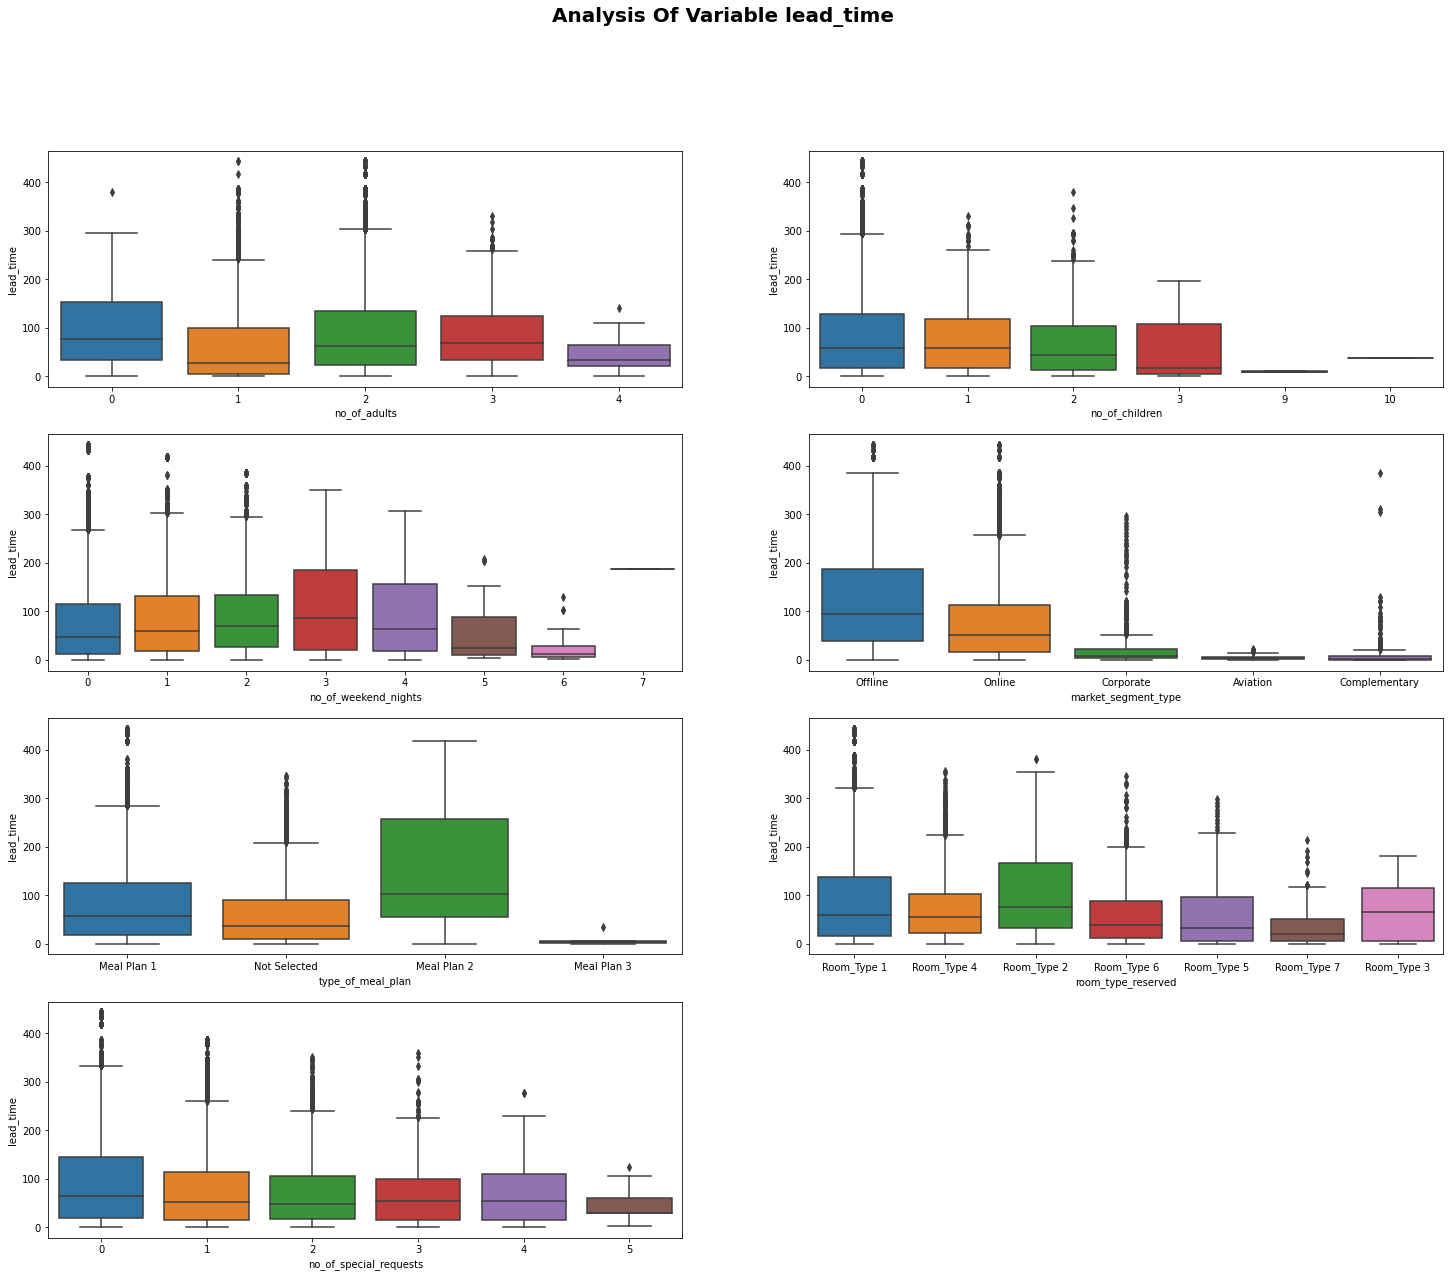

In [67]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="no_of_adults", y="lead_time", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="no_of_children", y="lead_time", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="no_of_weekend_nights", y="lead_time", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="market_segment_type", y="lead_time", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="type_of_meal_plan", y="lead_time", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="room_type_reserved", y="lead_time", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="no_of_special_requests", y="lead_time", data=df)

<AxesSubplot:xlabel='lead_time', ylabel='avg_price_per_room'>

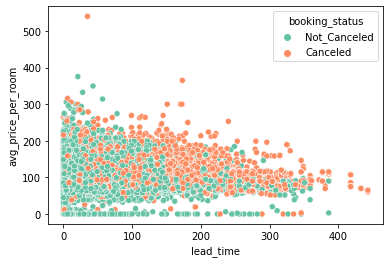

In [68]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'Set2', hue = 'booking_status')

In [69]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_per_room,season_booking
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,price from 50 to 100,autumn
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,price from 100 to 300,autumn
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,price from 50 to 100,winter
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,price +450,spring
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,price from 50 to 100,spring


In [70]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'price_per_room', 'season_booking'],
      dtype='object')

In [71]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

### -->Correlation

<AxesSubplot:>

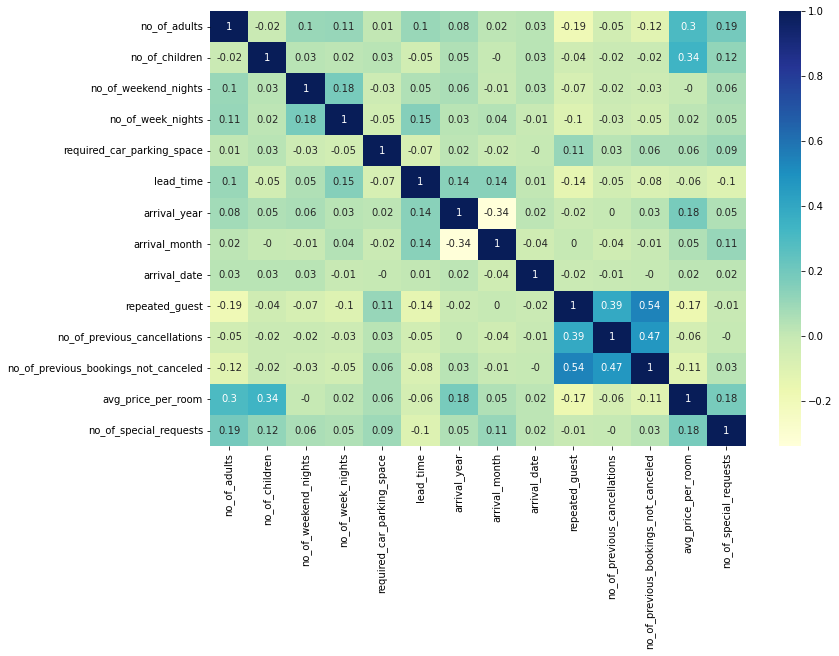

In [72]:
correlation = df.corr().round(2)
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = 'YlGnBu')

### ---> `Split`

In [73]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_per_room,season_booking
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,price from 50 to 100,autumn
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,price from 100 to 300,autumn
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,price from 50 to 100,winter
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,price +450,spring
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,price from 50 to 100,spring


In [74]:
df_new = df.copy()

In [75]:
df_new.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_per_room,season_booking
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,price from 50 to 100,autumn
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,price from 100 to 300,autumn
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,price from 50 to 100,winter
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,price +450,spring
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,price from 50 to 100,spring


In [76]:
df_new.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'price_per_room', 'season_booking'],
      dtype='object')

In [77]:
# remove some columns 
df_new.drop(columns=['Booking_ID','type_of_meal_plan','required_car_parking_space','market_segment_type','avg_price_per_room','lead_time','arrival_year'],inplace=True)

In [78]:
df_new.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,room_type_reserved,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status,price_per_room,season_booking
0,2,0,1,2,Room_Type 1,10,2,0,0,0,0,Not_Canceled,price from 50 to 100,autumn
1,2,0,2,3,Room_Type 1,11,6,0,0,0,1,Not_Canceled,price from 100 to 300,autumn
2,1,0,2,1,Room_Type 1,2,28,0,0,0,0,Canceled,price from 50 to 100,winter
3,2,0,0,2,Room_Type 1,5,20,0,0,0,0,Canceled,price +450,spring
4,2,0,1,1,Room_Type 1,4,11,0,0,0,0,Canceled,price from 50 to 100,spring


In [79]:
# split to feature & target
X = df_new.drop(columns=['booking_status'],axis=1) #feature
y = df_new['booking_status'] #target

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45,shuffle=True,stratify=y)

In [81]:
X_train.shape,y_train.shape

((29020, 13), (29020,))

In [82]:
X_test.shape,y_test.shape

((7255, 13), (7255,))

In [83]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,room_type_reserved,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,price_per_room,season_booking
9363,2,2,1,3,Room_Type 6,6,27,0,0,0,2,price from 100 to 300,summer
24092,2,0,2,1,Room_Type 4,12,6,0,0,0,0,price from 50 to 100,winter
29498,2,0,2,1,Room_Type 4,11,7,0,0,0,0,price from 50 to 100,autumn
6542,2,0,2,9,Room_Type 4,3,15,0,0,0,0,price from 100 to 300,spring
29508,2,0,1,1,Room_Type 1,8,13,0,0,0,0,price from 100 to 300,summer


In [84]:
y_train.head()

9363     Not_Canceled
24092    Not_Canceled
29498    Not_Canceled
6542         Canceled
29508        Canceled
Name: booking_status, dtype: object

In [85]:
X_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,room_type_reserved,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,price_per_room,season_booking
11730,2,0,0,2,Room_Type 1,10,9,0,0,0,1,price from 50 to 100,autumn
4664,2,0,2,3,Room_Type 1,3,13,0,0,0,0,price from 50 to 100,spring
26460,2,0,2,2,Room_Type 4,11,4,0,0,0,2,price from 100 to 300,autumn
6787,1,0,0,2,Room_Type 1,9,18,0,0,0,0,price from 50 to 100,autumn
7367,1,0,2,1,Room_Type 1,11,13,0,0,0,0,price from 50 to 100,autumn


### ---> `Preprossing`

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29020 entries, 9363 to 14672
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   no_of_adults                          29020 non-null  int64 
 1   no_of_children                        29020 non-null  int64 
 2   no_of_weekend_nights                  29020 non-null  int64 
 3   no_of_week_nights                     29020 non-null  int64 
 4   room_type_reserved                    29020 non-null  object
 5   arrival_month                         29020 non-null  int64 
 6   arrival_date                          29020 non-null  int64 
 7   repeated_guest                        29020 non-null  int64 
 8   no_of_previous_cancellations          29020 non-null  int64 
 9   no_of_previous_bookings_not_canceled  29020 non-null  int64 
 10  no_of_special_requests                29020 non-null  int64 
 11  price_per_room           

In [87]:
## select columns ---->>
num_col1 = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights']
num_col2 = ['arrival_month','arrival_date','repeated_guest']
num_col3 = ['no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests']
catg_col1 = ['price_per_room','room_type_reserved']
catg_col2 = ['season_booking']



print(num_col1)
print(num_col2)
print(num_col3)
print(catg_col1)
print(catg_col2)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights']
['arrival_month', 'arrival_date', 'repeated_guest']
['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests']
['price_per_room', 'room_type_reserved']
['season_booking']


In [88]:
## make Pipeline ---->>
num_pip_1 = Pipeline(steps=[
                           ('selector', DataFrameSelector(num_col1)),
                           ('imputer', SimpleImputer(strategy = 'median')),
                           ('scaler', StandardScaler())
                            ])
num_pip_2 = Pipeline(steps=[
                           ('selector', DataFrameSelector(num_col2)),
                           ('imputer', SimpleImputer(strategy = 'median')),
                           ('scaler', StandardScaler())
                            ])
num_pip_3 = Pipeline(steps=[
                           ('selector', DataFrameSelector(num_col3)),
                           ('imputer', SimpleImputer(strategy = 'median')),
                           ('scaler', StandardScaler())
                            ])


catg_pip_1 = Pipeline(steps=[
                           ('selector', DataFrameSelector(catg_col1)),
                           ('imputer',  SimpleImputer(strategy = 'most_frequent')),
                           ('encoder', (OrdinalEncoder()))
                            ])

catg_pip_2 = Pipeline(steps=[
                           ('selector', DataFrameSelector(catg_col2)),
                           ('imputer',  SimpleImputer(strategy = 'most_frequent')),
                           ('encoder', (OneHotEncoder(sparse=False , drop='first')))
                           ])




total_pipline = FeatureUnion(transformer_list=[
                                               ('num1', num_pip_1),
                                               ('num2', num_pip_2),
                                               ('num3', num_pip_3),
                                               ('catg1', catg_pip_1),
                                               ('catg2', catg_pip_2 )
                                            
                                               ])

In [89]:
## fit & tranform ---->>
X_train_final = total_pipline.fit_transform(X_train)
X_test_final = total_pipline.transform(X_test)

In [90]:
print(X_train_final.shape)

(29020, 15)


In [91]:
print(X_test_final.shape)

(7255, 15)


In [92]:
y.head()

0    Not_Canceled
1    Not_Canceled
2        Canceled
3        Canceled
4        Canceled
Name: booking_status, dtype: object

In [93]:
# target final
lb = LabelEncoder()

y_train_final = lb.fit_transform(y_train)
y_test_final = lb.transform(y_test)

print(y_train_final.shape)
print(y_test_final.shape)


(29020,)
(7255,)


## ---> `Build Model`

##### 1-RandomForestClassifier

In [94]:
# build RandomForestClassifier model ---> 1

rfc = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=45)

rfc.fit(X_train_final,y_train_final)

score = rfc.score(X_train_final,y_train_final)
score

y_pred_train = rfc.predict(X_train_final)
f1_score(y_train_final, y_pred_train)

y_pred_rfc = rfc.predict(X_test_final)
fscore_rfc = f1_score(y_test_final, y_pred_rfc)
fscore_rfc

0.8668773454473632

##### 2-SGDClassifier

In [95]:
# build SGDClassifier model -->   2

lc = SGDClassifier()

lc.fit(X_train_final,y_train_final)

score_lc = lc.score(X_train_final,y_train_final)
score_lc

y_pred_lc = lc.predict(X_test_final)
fscore_lc = f1_score(y_test_final, y_pred_lc)
fscore_lc



0.7811778870271898

##### 3-AdaboostClassifier

In [96]:
# build AdaboostClassifier model --->   3
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100 , random_state=42)

adaboost.fit(X_train_final,y_train_final)

score_ada = adaboost.score(X_train_final,y_train_final)
score_ada

y_pred_ada = adaboost.predict(X_test_final)
fscore_ada = f1_score(y_test_final, y_pred_ada)
fscore_ada

0.8533762705041763

##### 4-GradientBoostingClassifier

In [97]:
# build GradientBoostingClassifier model --->  4
gbc = GradientBoostingClassifier(n_estimators=50,max_depth=20,learning_rate=0.5,random_state=45)

gbc.fit(X_train_final,y_train_final)

score_gbc = gbc.score(X_train_final,y_train_final)
score_gbc

y_pred_gbc = gbc.predict(X_test_final)
fscore_gbc = f1_score(y_test_final, y_pred_gbc)
fscore_gbc

0.8552937607442612

### `RandomForestClassifier` is the best in f1score,
### i will fine tune it & solve overfitting problem ---->>>

In [98]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=45)
params_best_grid = {
            'n_estimators': np.arange(50, 400, 50),
            'max_depth': np.arange(2, 10, 2)
}
grid_forest = GridSearchCV(estimator=rfc, 
                           param_grid=params_best_grid, cv=5, scoring='f1', verbose=2)

grid_forest.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.4s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.7s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.8s
[CV] END ......................max_depth=2, n_e

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, random_state=45),
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350])},
             scoring='f1', verbose=2)

In [100]:
grid_forest.best_score_

0.8346578032476792

In [101]:
grid_forest.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=45)

In [102]:
grid_forest.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [103]:
joblib.dump(grid_forest , 'models/grid_forest.pkl')

['models/grid_forest.pkl']

In [104]:
## Using the tuned forest as model
forest_tuned = grid_forest.best_estimator_
forest_tuned.fit(X_train_final, y_train_final)


## Predict and evaluate
y_pred_train_forest_tuned = forest_tuned.predict(X_train_final)
y_pred_test_forest_tuned = forest_tuned.predict(X_test_final)

## Using r2_score
score_train_forest_tuned = f1_score(y_train_final, y_pred_train_forest_tuned)
score_test_forest_tuned = f1_score(y_test_final, y_pred_test_forest_tuned)

print(f'The f1_score using tuned gbrt model for Training Dataset  {score_train_forest_tuned*100:.3f}')
print(f'The f1_score using tuned gbrt model for Testing Dataset  {score_test_forest_tuned*100:.3f}')

The f1_score using tuned gbrt model for Training Dataset  83.740
The f1_score using tuned gbrt model for Testing Dataset  83.452


## `Thank You` ----->